# **Climate Analysis**

In [7]:
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Define the path to the zip file
zip_file_path = "/content/archive (1).zip"
dfs = []

# Extract files from the zip archive and read them into dataframes
with zipfile.ZipFile(zip_file_path, 'r') as zf:
    for fname in zf.namelist():
        with zf.open(fname) as f:
            dfs.append(pd.read_csv(f))

# Display the first few rows of each dataframe
for idx, df in enumerate(dfs):
    print(f"Preview of {zf.namelist()[idx]}:")
    print(df.head(), "\n")

Preview of daily_data.csv:
       STATION                 DATE REPORT_TYPE  SOURCE BackupElements  \
0  72518014735  2015-01-01T23:59:00       SOD         6         PRECIP   
1  72518014735  2015-01-02T23:59:00       SOD         6         PRECIP   
2  72518014735  2015-01-03T23:59:00       SOD         6         PRECIP   
3  72518014735  2015-01-04T23:59:00       SOD         6         PRECIP   
4  72518014735  2015-01-05T23:59:00       SOD         6         PRECIP   

   BackupElevation BackupEquipment  BackupLatitude  BackupLongitude  \
0              260         PLASTIC         42.6918        -73.83109   
1              260         PLASTIC         42.6918        -73.83109   
2              260         PLASTIC         42.6918        -73.83109   
3              260         PLASTIC         42.6918        -73.83109   
4              260         PLASTIC         42.6918        -73.83109   

       BackupName  ...  DailyPeakWindDirection  DailyPeakWindSpeed  \
0  NWS ALBANY, NY  ...         

<ipython-input-6-60ee697d9eab>:9: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(f))


Summary of daily_data.csv:
Statistical Overview:
            STATION  SOURCE  BackupElevation  BackupLatitude  BackupLongitude  \
count  2.668000e+03  2668.0           2668.0     2668.000000      2668.000000   
mean   7.251801e+10     6.0            260.0       42.689750       -73.828268   
std    0.000000e+00     0.0              0.0        0.004187         0.005764   
min    7.251801e+10     6.0            260.0       42.681200       -73.831090   
25%    7.251801e+10     6.0            260.0       42.691800       -73.831090   
50%    7.251801e+10     6.0            260.0       42.691800       -73.831090   
75%    7.251801e+10     6.0            260.0       42.691800       -73.831090   
max    7.251801e+10     6.0            260.0       42.691800       -73.816500   

       DailyAverageDewPointTemperature  DailyAverageDryBulbTemperature  \
count                      2668.000000                     2668.000000   
mean                         38.217766                       50.107571   

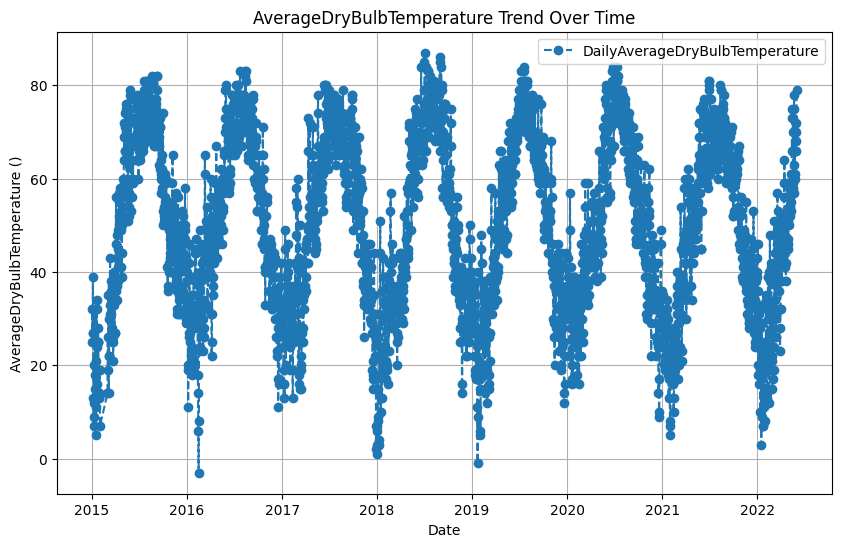

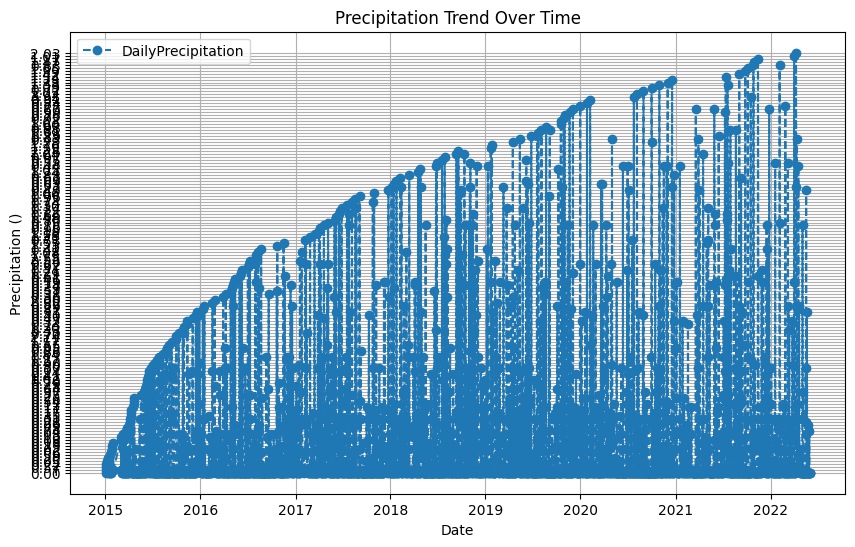

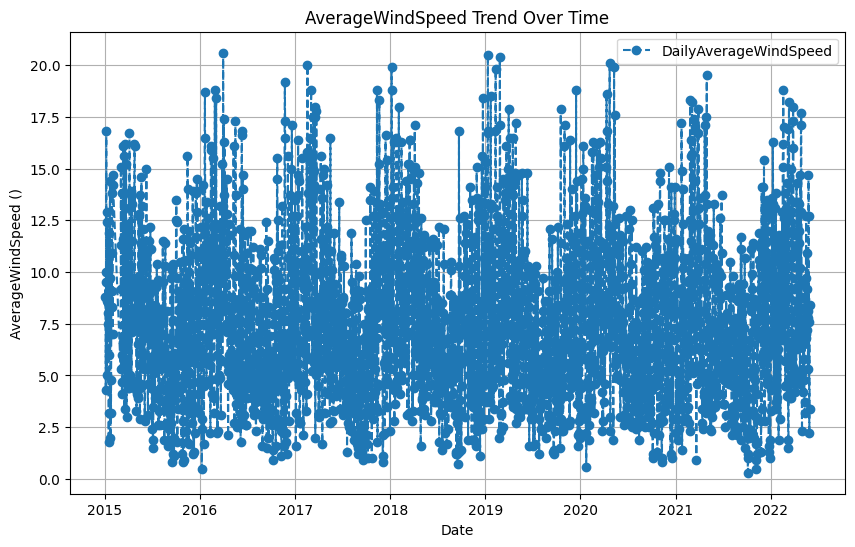



Summary of hourly_data.csv:
Statistical Overview:
            STATION        SOURCE  BackupElevation  BackupLatitude  \
count  6.472900e+04  64729.000000          64729.0    64729.000000   
mean   7.251801e+10      6.994207            260.0       42.689775   
std    0.000000e+00      0.075894              0.0        0.004167   
min    7.251801e+10      6.000000            260.0       42.681200   
25%    7.251801e+10      7.000000            260.0       42.691800   
50%    7.251801e+10      7.000000            260.0       42.691800   
75%    7.251801e+10      7.000000            260.0       42.691800   
max    7.251801e+10      7.000000            260.0       42.691800   

       BackupLongitude  HourlyRelativeHumidity  HourlyVisibility  \
count     64729.000000            64729.000000      64729.000000   
mean        -73.828303               66.361538          9.315017   
std           0.005736               18.376979          2.128327   
min         -73.831090                8.00000

In [3]:
# Provide a summary of each dataframe
for idx, df in enumerate(dfs):
    print(f"Summary of {zf.namelist()[idx]}:")
    print("Statistical Overview:")
    print(df.describe(), "\n")

    # Check and convert 'DATE' column to datetime if present
    if 'DATE' in df.columns:
        df['DATE'] = pd.to_datetime(df['DATE'])
        # Plot selected variables over time if they exist
        variables = ['DailyAverageDryBulbTemperature', 'DailyPrecipitation', 'DailyAverageWindSpeed']
        for var in variables:
            if var in df.columns:
                plt.figure(figsize=(10, 6))
                plt.plot(df['DATE'], df[var], label=var, linestyle='--', marker='o')
                plt.xlabel('Date')
                plt.ylabel(f'{var.split("Daily")[1]} ({var.split("Daily")[0]})')
                plt.title(f'{var.split("Daily")[1]} Trend Over Time')
                plt.legend()
                plt.grid(True)
                plt.show()
    print("\n")

Exploratory Data Analysis for daily_data.csv:
Non-numeric columns to drop:
Index(['REPORT_TYPE', 'BackupElements', 'BackupEquipment', 'BackupName',
       'DailySnowDepth', 'DailySnowfall', 'WindEquipmentChangeDate'],
      dtype='object')
Correlation Matrix:
                                            STATION      DATE  SOURCE  \
STATION                                         NaN       NaN     NaN   
DATE                                            NaN  1.000000     NaN   
SOURCE                                          NaN       NaN     NaN   
BackupElevation                                 NaN       NaN     NaN   
BackupLatitude                                  NaN -0.682925     NaN   
BackupLongitude                                 NaN  0.682925     NaN   
DailyAverageDewPointTemperature                 NaN -0.007946     NaN   
DailyAverageDryBulbTemperature                  NaN -0.063140     NaN   
DailyAverageRelativeHumidity                    NaN  0.189142     NaN   
DailyAvera

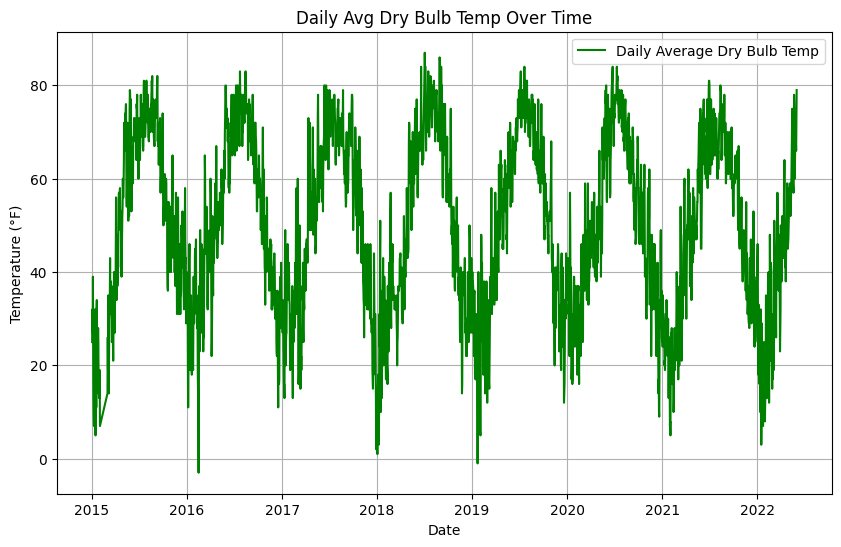

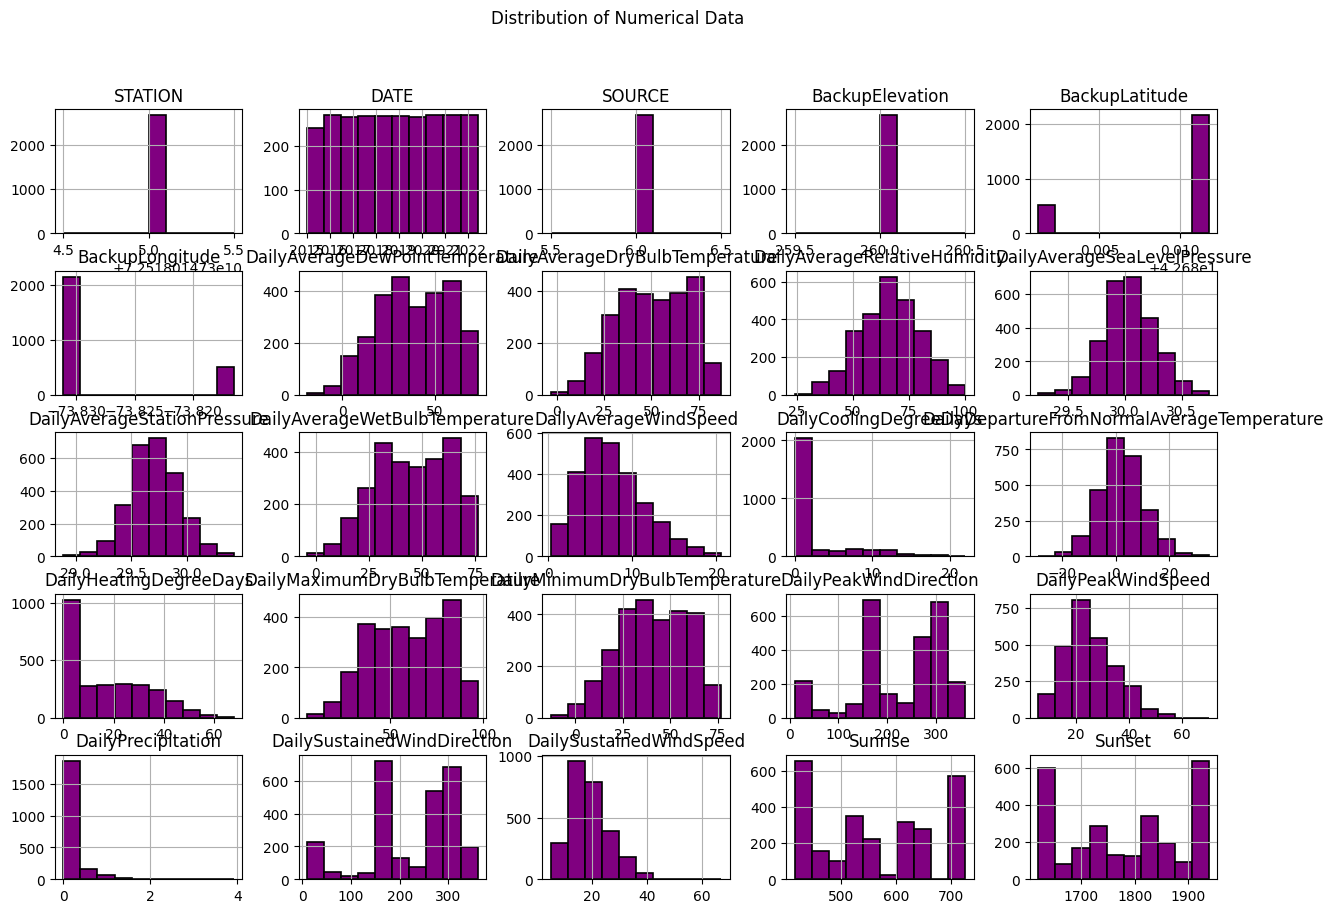

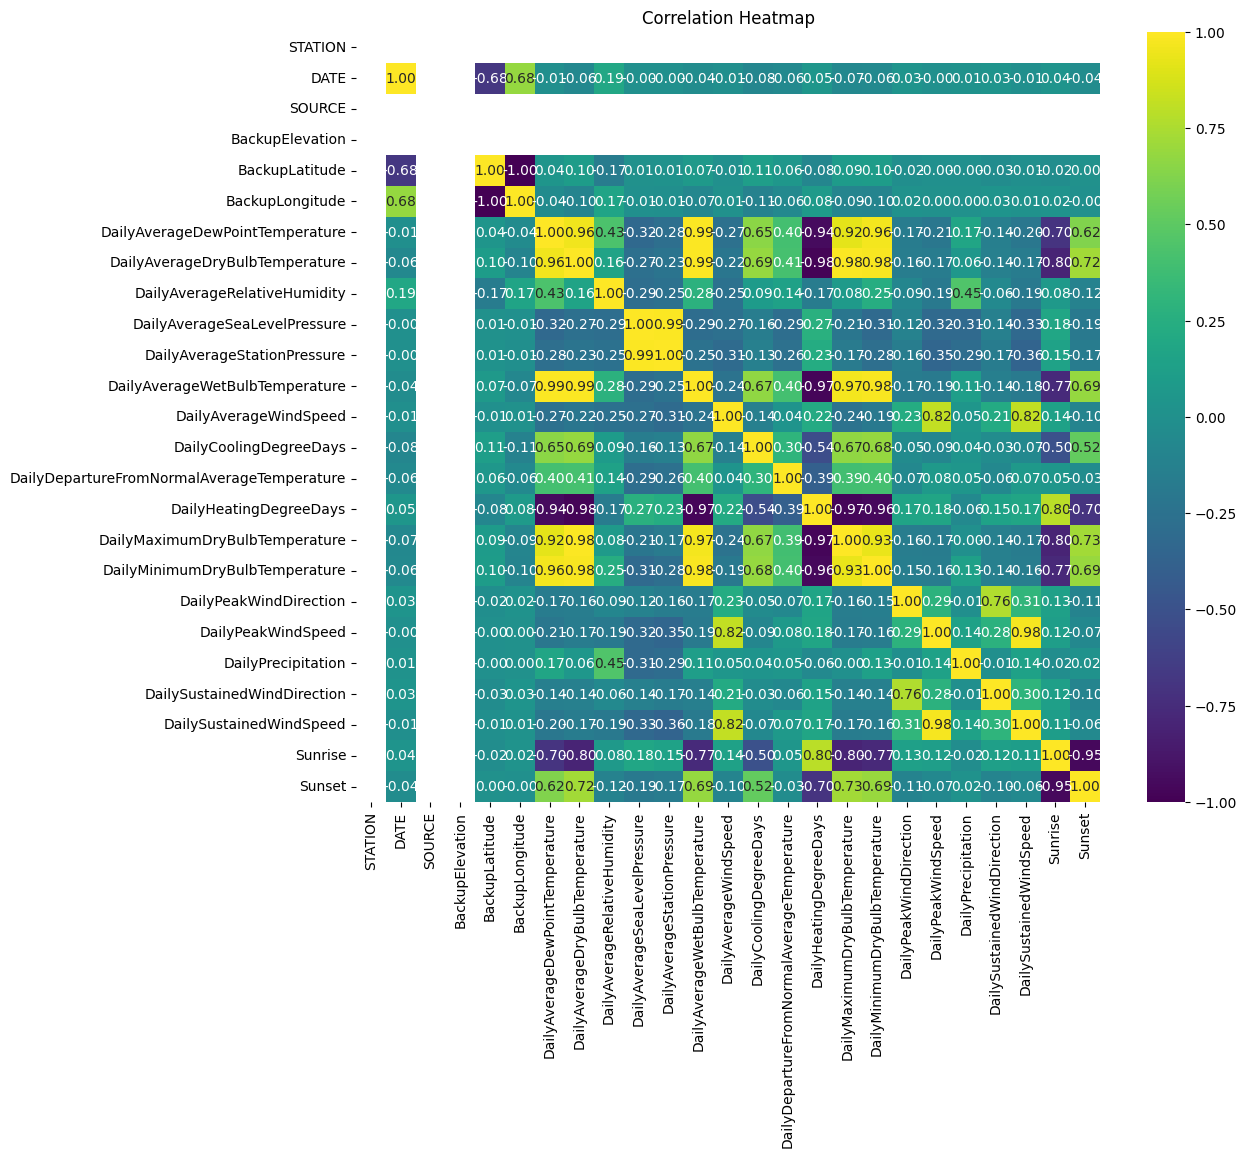

Exploratory Data Analysis for hourly_data.csv:
Exploratory Data Analysis for monthly_data.csv:
Exploratory Data Analysis for three_hour_data.csv:


In [4]:

# Conduct exploratory data analysis for each dataframe
for idx, df in enumerate(dfs):
    print(f"Exploratory Data Analysis for {zf.namelist()[idx]}:")
    if 'DATE' in df.columns and 'DailyAverageDryBulbTemperature' in df.columns:
        # Identify and remove non-numeric columns EXCLUDING 'DailyPrecipitation'
        non_numeric_columns = df.select_dtypes(include='object').columns
        non_numeric_columns = non_numeric_columns.drop('DailyPrecipitation', errors='ignore') # Ignore if 'DailyPrecipitation' is not present
        if non_numeric_columns.any():
            print("Non-numeric columns to drop:")
            print(non_numeric_columns)
            df.drop(non_numeric_columns, axis=1, inplace=True)

        # Handle non-numeric values in 'DailyPrecipitation'
        if 'DailyPrecipitation' in df.columns:
            df['DailyPrecipitation'] = pd.to_numeric(df['DailyPrecipitation'], errors='coerce') # Convert to numeric, replacing non-numeric with NaN

        # Display the correlation matrix
        print("Correlation Matrix:")
        corr_matrix = df.corr()
        print(corr_matrix, "\n")


        # Plot temperature data over time
        print("Visualizations:")
        plt.figure(figsize=(10, 6))
        plt.plot(df['DATE'], df['DailyAverageDryBulbTemperature'], label='Daily Average Dry Bulb Temp', color='green')
        plt.xlabel('Date')
        plt.ylabel('Temperature (°F)')
        plt.title('Daily Avg Dry Bulb Temp Over Time')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Plot histograms of numerical data
        df.hist(figsize=(15, 10), color='purple', edgecolor='black', linewidth=1.2)
        plt.suptitle('Distribution of Numerical Data')
        plt.show()

        # Generate a heatmap of the correlation matrix
        plt.figure(figsize=(12, 10))
        sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
        plt.title('Correlation Heatmap')
        plt.show()

        # Pairplot for selected variables
        selected_vars = ['DailyAverageDryBulbTemperature', 'DailyPrecipitation', 'DailyAverageWindSpeed']
        df_selected = df[selected_vars].dropna()